In [1]:
from numpy.random import default_rng
import numpy as np
import pandas as pd
import plotly.express as px
from statsmodels.tsa.stattools import  acf
from statsmodels.tsa.stattools import  pacf
from statsmodels.graphics import tsaplots 
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Simulating AR(1) Process
$X_t = 0.5 \times X_{t-1} + w_t$ \\



In [15]:

rng = default_rng(12345)


n_points = 200
ar_factor = 0.5
w_std = 2.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2022-04-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2022-04-20,2022-04-20,0.000000
2022-04-21,2022-04-21,-2.847650
2022-04-22,2022-04-22,1.103632
2022-04-23,2022-04-23,-1.189508
2022-04-24,2022-04-24,-1.113100
...,...,...
2022-11-01,2022-11-01,0.069999
2022-11-02,2022-11-02,1.407365
2022-11-03,2022-11-03,3.133692
2022-11-04,2022-11-04,1.998965


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



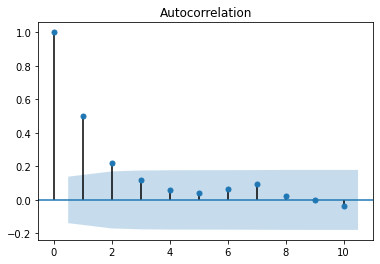

[ 1.          0.50296539  0.22091127  0.11686122  0.06040308  0.0382703
  0.06281649  0.09207996  0.02628865  0.00176565 -0.03775726]


In [11]:
nlag = 10
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

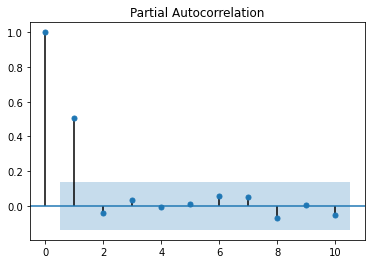

[ 1.          0.50549285 -0.04349406  0.03085008 -0.00452864  0.01164205
  0.05414861  0.0525279  -0.06836765  0.00549386 -0.05423122]


In [12]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = 10)
plt.show()
print(result)

ACF plots the correlation between time series with a lagged version of itself. It considers both direct and indirect effects. 
The PACF at lag k is the autocorrelation between  Xt  and  Xt−k  that is not accounted for by lags 1 through  k−1. It considers only the direct effects.

Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

The respective weights(Ф1,Ф2 …Фp) of the corresponding lagged
observations are decided by the correlation between that lagged
observation and the current observation

Factor value defines how strong of a correlation we have at lag= 1. The question asks for a strong correlation therefore, a factor value of 0.5 depicts a strong correlation at lag=1